In [1]:
# Data Analysis libraries
import numpy as np
import pandas as pd

import string
import os


# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

# NLP Modules
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer


# SkLearn for ML Model
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [2]:
df_train = pd.read_csv("final_file_3.csv")

In [3]:
df_train


,Review,Label,sim_score,lex_val_score,lex_div_score,sentiment_score
0,the best soundtrack ever to anything.i'm readi...,2,0.000000,0.275362,0.357488,0.9869
1,amazing!this soundtrack is my favorite music o...,2,0.457450,0.217791,0.306748,0.9963
2,excellent soundtracki truly like this soundtra...,2,0.536652,0.196491,0.298246,0.9945
3,"remember, pull your jaw off the floor after he...",2,0.392120,0.264706,0.362745,0.9944
4,an absolute masterpiecei am quite sure any of ...,2,0.502954,0.219880,0.313253,0.9968
...,...,...,...,...,...,...
3599994,don't do it!!the high chair looks great when i...,1,0.309465,0.285714,0.343915,0.9794
3599995,"looks nice, low functionalityi have used this ...",1,0.567870,0.232057,0.294258,0.7105
3599996,"compact, but hard to cleanwe have a small hous...",1,0.585350,0.234987,0.300261,0.9817
3599997,what is it saying?not sure what this book is s...,1,0.468018,0.266667,0.369231,0.8689


In [4]:
df_train

,Review,Label,sim_score,lex_val_score,lex_div_score,sentiment_score
0,the best soundtrack ever to anything.i'm readi...,2,0.000000,0.275362,0.357488,0.9869
1,amazing!this soundtrack is my favorite music o...,2,0.457450,0.217791,0.306748,0.9963
2,excellent soundtracki truly like this soundtra...,2,0.536652,0.196491,0.298246,0.9945
3,"remember, pull your jaw off the floor after he...",2,0.392120,0.264706,0.362745,0.9944
4,an absolute masterpiecei am quite sure any of ...,2,0.502954,0.219880,0.313253,0.9968
...,...,...,...,...,...,...
3599994,don't do it!!the high chair looks great when i...,1,0.309465,0.285714,0.343915,0.9794
3599995,"looks nice, low functionalityi have used this ...",1,0.567870,0.232057,0.294258,0.7105
3599996,"compact, but hard to cleanwe have a small hous...",1,0.585350,0.234987,0.300261,0.9817
3599997,what is it saying?not sure what this book is s...,1,0.468018,0.266667,0.369231,0.8689


In [5]:
df_test = pd.read_csv("test.csv",header=0,names=['Label','Review','Description'])

In [6]:
df_test

,Label,Review,Description
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...
...,...,...,...
399994,1,Unbelievable- In a Bad Way,We bought this Thomas for our son who is a hug...
399995,1,"Almost Great, Until it Broke...",My son recieved this as a birthday gift 2 mont...
399996,1,Disappointed !!!,"I bought this toy for my son who loves the ""Th..."
399997,2,Classic Jessica Mitford,This is a compilation of a wide range of Mitfo...


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399999 entries, 0 to 399998
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Label        399999 non-null  int64 
 1   Review       399989 non-null  object
 2   Description  399999 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.2+ MB


In [8]:
df_test.describe(include='all')

,Label,Review,Description
count,399999.000000,399989,399999
unique,NaN,328392,399916
top,NaN,Disappointed,Really enjoyed this classic FPS. Hardcore game...
freq,NaN,1046,3
mean,1.499999,NaN,NaN
std,0.500001,NaN,NaN
min,1.000000,NaN,NaN
25%,1.000000,NaN,NaN
50%,1.000000,NaN,NaN
75%,2.000000,NaN,NaN


In [9]:
df_test.isnull().sum()

Label           0
Review         10
Description     0
dtype: int64

In [10]:
df_test.ffill(axis=0,inplace=True)

In [13]:
df_test

,Label,Review,Description
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...
...,...,...,...
399994,1,Unbelievable- In a Bad Way,We bought this Thomas for our son who is a hug...
399995,1,"Almost Great, Until it Broke...",My son recieved this as a birthday gift 2 mont...
399996,1,Disappointed !!!,"I bought this toy for my son who loves the ""Th..."
399997,2,Classic Jessica Mitford,This is a compilation of a wide range of Mitfo...


In [14]:
df_test["Review"] = df_test.apply(lambda x: x["Review"]+" "+x["Description"],axis=1)

In [15]:
df_test

,Label,Review,Description
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ... I bought this...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better Check ou...",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile Reviewed quite a ...,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year I also b...,I also began having the incorrect disc problem...
...,...,...,...
399994,1,Unbelievable- In a Bad Way We bought this Thom...,We bought this Thomas for our son who is a hug...
399995,1,"Almost Great, Until it Broke... My son recieve...",My son recieved this as a birthday gift 2 mont...
399996,1,Disappointed !!! I bought this toy for my son ...,"I bought this toy for my son who loves the ""Th..."
399997,2,Classic Jessica Mitford This is a compilation ...,This is a compilation of a wide range of Mitfo...


In [16]:
df_test['Review'] = df_test['Review'].apply(lambda x: x.lower())

In [17]:
df_test

,Label,Review,Description
0,2,one of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,batteries died within a year ... i bought this...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but maha energy is better check ou...",Check out Maha Energy's website. Their Powerex...
3,2,great for the non-audiophile reviewed quite a ...,Reviewed quite a bit of the combo players and ...
4,1,dvd player crapped out after one year i also b...,I also began having the incorrect disc problem...
...,...,...,...
399994,1,unbelievable- in a bad way we bought this thom...,We bought this Thomas for our son who is a hug...
399995,1,"almost great, until it broke... my son recieve...",My son recieved this as a birthday gift 2 mont...
399996,1,disappointed !!! i bought this toy for my son ...,"I bought this toy for my son who loves the ""Th..."
399997,2,classic jessica mitford this is a compilation ...,This is a compilation of a wide range of Mitfo...


In [19]:
df_test.drop(['Description'],axis = 1,inplace=True)

In [20]:
df_test

,Label,Review
0,2,one of the best game music soundtracks - for a...
1,1,batteries died within a year ... i bought this...
2,2,"works fine, but maha energy is better check ou..."
3,2,great for the non-audiophile reviewed quite a ...
4,1,dvd player crapped out after one year i also b...
...,...,...
399994,1,unbelievable- in a bad way we bought this thom...
399995,1,"almost great, until it broke... my son recieve..."
399996,1,disappointed !!! i bought this toy for my son ...
399997,2,classic jessica mitford this is a compilation ...


In [22]:
df_test['shifted_review'] = df_test['Review'].shift(1)
df_test

,Label,Review,shifted_review
0,2,one of the best game music soundtracks - for a...,NaN
1,1,batteries died within a year ... i bought this...,one of the best game music soundtracks - for a...
2,2,"works fine, but maha energy is better check ou...",batteries died within a year ... i bought this...
3,2,great for the non-audiophile reviewed quite a ...,"works fine, but maha energy is better check ou..."
4,1,dvd player crapped out after one year i also b...,great for the non-audiophile reviewed quite a ...
...,...,...,...
399994,1,unbelievable- in a bad way we bought this thom...,obey the warning this is a fun toy and my 2 an...
399995,1,"almost great, until it broke... my son recieve...",unbelievable- in a bad way we bought this thom...
399996,1,disappointed !!! i bought this toy for my son ...,"almost great, until it broke... my son recieve..."
399997,2,classic jessica mitford this is a compilation ...,disappointed !!! i bought this toy for my son ...


In [23]:
df_test['sim_score'] = df_test.apply(lambda x: get_cosine(x['Review'], str(x['shifted_review'])), axis=1)

In [24]:
df_test

,Label,Review,shifted_review,sim_score
0,2,one of the best game music soundtracks - for a...,NaN,0.000000
1,1,batteries died within a year ... i bought this...,one of the best game music soundtracks - for a...,0.316884
2,2,"works fine, but maha energy is better check ou...",batteries died within a year ... i bought this...,0.223309
3,2,great for the non-audiophile reviewed quite a ...,"works fine, but maha energy is better check ou...",0.270464
4,1,dvd player crapped out after one year i also b...,great for the non-audiophile reviewed quite a ...,0.196296
...,...,...,...,...
399994,1,unbelievable- in a bad way we bought this thom...,obey the warning this is a fun toy and my 2 an...,0.443192
399995,1,"almost great, until it broke... my son recieve...",unbelievable- in a bad way we bought this thom...,0.313604
399996,1,disappointed !!! i bought this toy for my son ...,"almost great, until it broke... my son recieve...",0.436171
399997,2,classic jessica mitford this is a compilation ...,disappointed !!! i bought this toy for my son ...,0.274593


In [26]:
df_test.drop(columns=['shifted_review'],axis=1,inplace=True)

In [27]:
df_test

,Label,Review,sim_score
0,2,one of the best game music soundtracks - for a...,0.000000
1,1,batteries died within a year ... i bought this...,0.316884
2,2,"works fine, but maha energy is better check ou...",0.223309
3,2,great for the non-audiophile reviewed quite a ...,0.270464
4,1,dvd player crapped out after one year i also b...,0.196296
...,...,...,...
399994,1,unbelievable- in a bad way we bought this thom...,0.443192
399995,1,"almost great, until it broke... my son recieve...",0.313604
399996,1,disappointed !!! i bought this toy for my son ...,0.436171
399997,2,classic jessica mitford this is a compilation ...,0.274593


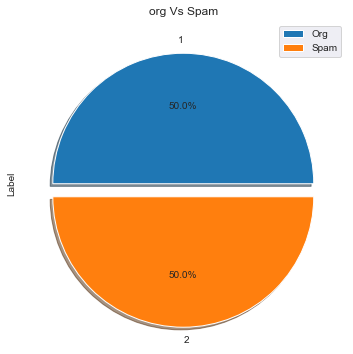

In [11]:
df_test['Label'].value_counts().plot(kind = 'pie',figsize = (6,6), explode = [0,0.1], shadow = True, autopct = '%1.1f%%')
plt.title('org Vs Spam')
plt.legend(['Org','Spam'])
plt.show()

In [12]:
import math
from collections import Counter
def get_cosine(text1, text2):
    
    word1 = text1.split()
    word2 = text2.split()
    
    vec1 = Counter(word1)
    vec2 = Counter(word2)
    
    common = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in common])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()]) 
    sum2 = sum([vec2[x]**2 for x in vec2.keys()]) 
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
   
    if not denominator:
        return 0.0 
    else:
        return float(numerator) / denominator


In [28]:
from nltk.tokenize import word_tokenize
from nltk.corpus import words

valid_words = set(words.words())

def calculate_validity(sentence):
    tokens = word_tokenize(sentence)
    valid_tokens = {token for token in tokens if token in valid_words}
    return len(valid_tokens) / len(tokens)

In [30]:
df_test['lex_val_score'] = df_test['Review'].apply(calculate_validity)

In [31]:
def calculate_unique(sentence):
    tokens = word_tokenize(sentence)
    unique_tokens = set(tokens)
    return len(unique_tokens) / len(tokens)

In [33]:
df_test['lex_div_score'] = df_test['Review'].apply(calculate_unique)

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sent = SentimentIntensityAnalyzer()

df_test['sentiment_score'] = df_test['Review'].apply(lambda x: sent.polarity_scores(x)['compound'])

In [35]:
df_test

,Label,Review,sim_score,lex_val_score,lex_div_score,sentiment_score
0,2,one of the best game music soundtracks - for a...,0.000000,0.481928,0.614458,0.8770
1,1,batteries died within a year ... i bought this...,0.316884,0.597015,0.746269,0.6597
2,2,"works fine, but maha energy is better check ou...",0.223309,0.444444,0.755556,0.7845
3,2,great for the non-audiophile reviewed quite a ...,0.270464,0.576923,0.807692,0.8388
4,1,dvd player crapped out after one year i also b...,0.196296,0.517647,0.705882,-0.3506
...,...,...,...,...,...,...
399994,1,unbelievable- in a bad way we bought this thom...,0.443192,0.397790,0.524862,0.5932
399995,1,"almost great, until it broke... my son recieve...",0.313604,0.525547,0.620438,-0.5144
399996,1,disappointed !!! i bought this toy for my son ...,0.436171,0.485294,0.617647,0.6911
399997,2,classic jessica mitford this is a compilation ...,0.274593,0.490196,0.725490,0.9217


In [36]:
df_test =  df_test.reindex(columns = ['Review','sim_score','lex_val_score','lex_div_score','lex_div_score',
                                       'sentiment_score','Label'])

In [38]:
df_test.to_csv("test_final.csv",index=False)

In [37]:
df_test

,Review,sim_score,lex_val_score,lex_div_score,lex_div_score,sentiment_score,Label
0,one of the best game music soundtracks - for a...,0.000000,0.481928,0.614458,0.614458,0.8770,2
1,batteries died within a year ... i bought this...,0.316884,0.597015,0.746269,0.746269,0.6597,1
2,"works fine, but maha energy is better check ou...",0.223309,0.444444,0.755556,0.755556,0.7845,2
3,great for the non-audiophile reviewed quite a ...,0.270464,0.576923,0.807692,0.807692,0.8388,2
4,dvd player crapped out after one year i also b...,0.196296,0.517647,0.705882,0.705882,-0.3506,1
...,...,...,...,...,...,...,...
399994,unbelievable- in a bad way we bought this thom...,0.443192,0.397790,0.524862,0.524862,0.5932,1
399995,"almost great, until it broke... my son recieve...",0.313604,0.525547,0.620438,0.620438,-0.5144,1
399996,disappointed !!! i bought this toy for my son ...,0.436171,0.485294,0.617647,0.617647,0.6911,1
399997,classic jessica mitford this is a compilation ...,0.274593,0.490196,0.725490,0.725490,0.9217,2


In [31]:
df_train = df_train.reindex(columns = ['Review','Description','sim_score','lex_val_score','lex_div_score','lex_div_score',
                                       'sentiment_score','Label'])
df_train

,Review,Description,sim_score,lex_val_score,lex_div_score,lex_div_score,sentiment_score,Label
0,the best soundtrack ever to anything.,i'm reading a lot of reviews saying that this ...,0.245487,0.554455,0.712871,0.712871,0.8481,2
1,amazing!,this soundtrack is my favorite music of all ti...,0.000000,0.438272,0.611111,0.611111,0.9854,2
2,excellent soundtrack,i truly like this soundtrack and i enjoy video...,0.123299,0.394366,0.591549,0.591549,0.9753,2
3,"remember, pull your jaw off the floor after he...","if you've played the game, you know how divine...",0.254000,0.474227,0.670103,0.670103,0.9781,2
4,an absolute masterpiece,i am quite sure any of you actually taking the...,0.031357,0.436364,0.618182,0.618182,0.9873,2
...,...,...,...,...,...,...,...,...
3599994,don't do it!!,the high chair looks great when it first comes...,0.000000,0.576087,0.663043,0.663043,0.8896,1
3599995,"looks nice, low functionality",i have used this highchair for 2 kids now and ...,0.044108,0.458937,0.579710,0.579710,0.3829,1
3599996,"compact, but hard to clean","we have a small house, and really wanted two o...",0.145486,0.460317,0.587302,0.587302,0.8767,1
3599997,what is it saying?,not sure what this book is supposed to be. it ...,0.265165,0.536842,0.736842,0.736842,0.2819,1


In [36]:
df_train[['Review','Description']]

,Review,Description
0,the best soundtrack ever to anything.,i'm reading a lot of reviews saying that this ...
1,amazing!,this soundtrack is my favorite music of all ti...
2,excellent soundtrack,i truly like this soundtrack and i enjoy video...
3,"remember, pull your jaw off the floor after he...","if you've played the game, you know how divine..."
4,an absolute masterpiece,i am quite sure any of you actually taking the...
...,...,...
3599994,don't do it!!,the high chair looks great when it first comes...
3599995,"looks nice, low functionality",i have used this highchair for 2 kids now and ...
3599996,"compact, but hard to clean","we have a small house, and really wanted two o..."
3599997,what is it saying?,not sure what this book is supposed to be. it ...


In [4]:
df_test = pd.read_csv("test_final.csv")

In [5]:
df_test

,Review,sim_score,lex_val_score,lex_div_score,lex_div_score.1,sentiment_score,Label
0,one of the best game music soundtracks - for a...,0.000000,0.481928,0.614458,0.614458,0.8770,2
1,batteries died within a year ... i bought this...,0.316884,0.597015,0.746269,0.746269,0.6597,1
2,"works fine, but maha energy is better check ou...",0.223309,0.444444,0.755556,0.755556,0.7845,2
3,great for the non-audiophile reviewed quite a ...,0.270464,0.576923,0.807692,0.807692,0.8388,2
4,dvd player crapped out after one year i also b...,0.196296,0.517647,0.705882,0.705882,-0.3506,1
...,...,...,...,...,...,...,...
399994,unbelievable- in a bad way we bought this thom...,0.443192,0.397790,0.524862,0.524862,0.5932,1
399995,"almost great, until it broke... my son recieve...",0.313604,0.525547,0.620438,0.620438,-0.5144,1
399996,disappointed !!! i bought this toy for my son ...,0.436171,0.485294,0.617647,0.617647,0.6911,1
399997,classic jessica mitford this is a compilation ...,0.274593,0.490196,0.725490,0.725490,0.9217,2


In [2]:
df_train = pd.read_csv("final_file_3.csv")

In [6]:
df_train

,Review,Label,sim_score,lex_val_score,lex_div_score,sentiment_score
0,the best soundtrack ever to anything.i'm readi...,2,0.000000,0.275362,0.357488,0.9869
1,amazing!this soundtrack is my favorite music o...,2,0.457450,0.217791,0.306748,0.9963
2,excellent soundtracki truly like this soundtra...,2,0.536652,0.196491,0.298246,0.9945
3,"remember, pull your jaw off the floor after he...",2,0.392120,0.264706,0.362745,0.9944
4,an absolute masterpiecei am quite sure any of ...,2,0.502954,0.219880,0.313253,0.9968
...,...,...,...,...,...,...
3599994,don't do it!!the high chair looks great when i...,1,0.309465,0.285714,0.343915,0.9794
3599995,"looks nice, low functionalityi have used this ...",1,0.567870,0.232057,0.294258,0.7105
3599996,"compact, but hard to cleanwe have a small hous...",1,0.585350,0.234987,0.300261,0.9817
3599997,what is it saying?not sure what this book is s...,1,0.468018,0.266667,0.369231,0.8689


In [4]:
## Vectorizations

# Count vectorizer
vectorizer = CountVectorizer()
bow_vectorizer = vectorizer.fit(df_train['Review'])
# print("Total number of words :",len(vectorizer.vocabulary_))


## Checking purpose



# ## Transform DF
message_bow = bow_vectorizer.transform(df_train['Review'])
print('Shape of my sparse matrix', message_bow.shape)

KeyboardInterrupt: 

In [15]:
# TF-IDF VEctorrizer
from sklearn.feature_extraction.text import TfidfTransformer

bow_vectorizer_tf = TfidfTransformer().fit(message_bow) 


In [17]:
message_tfidf = bow_vectorizer_tf.transform(message_bow)

In [18]:
print(message_tfidf.shape)

(3599999, 1620686)


In [20]:
df_train = df_train.reindex(columns = ['Review','sim_score','lex_val_score','lex_div_score','lex_div_score',
                                       'sentiment_score','Label'])
df_train

,Review,sim_score,lex_val_score,lex_div_score,lex_div_score,sentiment_score,Label
0,the best soundtrack ever to anything.i'm readi...,0.000000,0.275362,0.357488,0.357488,0.9869,2
1,amazing!this soundtrack is my favorite music o...,0.457450,0.217791,0.306748,0.306748,0.9963,2
2,excellent soundtracki truly like this soundtra...,0.536652,0.196491,0.298246,0.298246,0.9945,2
3,"remember, pull your jaw off the floor after he...",0.392120,0.264706,0.362745,0.362745,0.9944,2
4,an absolute masterpiecei am quite sure any of ...,0.502954,0.219880,0.313253,0.313253,0.9968,2
...,...,...,...,...,...,...,...
3599994,don't do it!!the high chair looks great when i...,0.309465,0.285714,0.343915,0.343915,0.9794,1
3599995,"looks nice, low functionalityi have used this ...",0.567870,0.232057,0.294258,0.294258,0.7105,1
3599996,"compact, but hard to cleanwe have a small hous...",0.585350,0.234987,0.300261,0.300261,0.9817,1
3599997,what is it saying?not sure what this book is s...,0.468018,0.266667,0.369231,0.369231,0.8689,1


In [24]:
X = df_train.iloc[:, :-1].values
y = tra.iloc[:, -1].values

In [26]:
print(X)

[["the best soundtrack ever to anything.i'm reading a lot of reviews saying that this is the best 'game soundtrack' and i figured that i'd write a review to disagree a bit. this in my opinino is yasunori mitsuda's ultimate masterpiece. the music is timeless and i'm been listening to it for years now and its beauty simply refuses to fade.the price tag on this is pretty staggering i must say, but if you are going to buy any cd for this much money, this is the only one that i feel would be worth every penny. i'm reading a lot of reviews saying that this is the best 'game soundtrack' and i figured that i'd write a review to disagree a bit. this in my opinino is yasunori mitsuda's ultimate masterpiece. the music is timeless and i'm been listening to it for years now and its beauty simply refuses to fade.the price tag on this is pretty staggering i must say, but if you are going to buy any cd for this much money, this is the only one that i feel would be worth every penny."
  0.0 0.275362318

In [28]:
print(y)

[2 2 2 ... 1 1 2]


In [30]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

print(x_train.shape)
print(x_test.shape)

(2879999, 6)
(720000, 6)


In [32]:
## MAchine learning algo import 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

review_detection_module = clf.fit(x_train,y_train)

ValueError: could not convert string to float: 'ink cartridge is smallink cartridge runs out fast. i wish they use a bigger cartrige for the printer. ink cartridge runs out fast. i wish they use a bigger cartrige for the printer.'

ModuleNotFoundError: No module named 'textblob'

In [8]:
!pip install textblob

In [9]:
from textblob import TextBlob


def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

In [10]:
df_train

,Review,Label,sim_score,lex_val_score,lex_div_score,sentiment_score
0,the best soundtrack ever to anything.i'm readi...,2,0.000000,0.275362,0.357488,0.9869
1,amazing!this soundtrack is my favorite music o...,2,0.457450,0.217791,0.306748,0.9963
2,excellent soundtracki truly like this soundtra...,2,0.536652,0.196491,0.298246,0.9945
3,"remember, pull your jaw off the floor after he...",2,0.392120,0.264706,0.362745,0.9944
4,an absolute masterpiecei am quite sure any of ...,2,0.502954,0.219880,0.313253,0.9968
...,...,...,...,...,...,...
3599994,don't do it!!the high chair looks great when i...,1,0.309465,0.285714,0.343915,0.9794
3599995,"looks nice, low functionalityi have used this ...",1,0.567870,0.232057,0.294258,0.7105
3599996,"compact, but hard to cleanwe have a small hous...",1,0.585350,0.234987,0.300261,0.9817
3599997,what is it saying?not sure what this book is s...,1,0.468018,0.266667,0.369231,0.8689


In [11]:
df_train['Review_Subjectivity'] = df_train['Review'].apply(getSubjectivity)

In [12]:
df_train

,Review,Label,sim_score,lex_val_score,lex_div_score,sentiment_score,Review_Subjectivity
0,the best soundtrack ever to anything.i'm readi...,2,0.000000,0.275362,0.357488,0.9869,0.530252
1,amazing!this soundtrack is my favorite music o...,2,0.457450,0.217791,0.306748,0.9963,0.525163
2,excellent soundtracki truly like this soundtra...,2,0.536652,0.196491,0.298246,0.9945,0.438095
3,"remember, pull your jaw off the floor after he...",2,0.392120,0.264706,0.362745,0.9944,0.520317
4,an absolute masterpiecei am quite sure any of ...,2,0.502954,0.219880,0.313253,0.9968,0.480101
...,...,...,...,...,...,...,...
3599994,don't do it!!the high chair looks great when i...,1,0.309465,0.285714,0.343915,0.9794,0.491263
3599995,"looks nice, low functionalityi have used this ...",1,0.567870,0.232057,0.294258,0.7105,0.544145
3599996,"compact, but hard to cleanwe have a small hous...",1,0.585350,0.234987,0.300261,0.9817,0.570259
3599997,what is it saying?not sure what this book is s...,1,0.468018,0.266667,0.369231,0.8689,0.531717


In [13]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
text = "This is my text. It icludes commas, question marks? and other stuff. Also U.S.."
tokens = tokenizer.tokenize(text)

In [15]:
df_train['Count_of_text']=df_train['Review'].apply(lambda x: len(tokenizer.tokenize(x)))

,Review,Label,sim_score,lex_val_score,lex_div_score,sentiment_score,Review_Subjectivity,Count_of_text
0,the best soundtrack ever to anything.i'm readi...,2,0.000000,0.275362,0.357488,0.9869,0.530252,198
1,amazing!this soundtrack is my favorite music o...,2,0.457450,0.217791,0.306748,0.9963,0.525163,271
2,excellent soundtracki truly like this soundtra...,2,0.536652,0.196491,0.298246,0.9945,0.438095,241
3,"remember, pull your jaw off the floor after he...",2,0.392120,0.264706,0.362745,0.9944,0.520317,169
4,an absolute masterpiecei am quite sure any of ...,2,0.502954,0.219880,0.313253,0.9968,0.480101,294
...,...,...,...,...,...,...,...,...
3599994,don't do it!!the high chair looks great when i...,1,0.309465,0.285714,0.343915,0.9794,0.491263,170
3599995,"looks nice, low functionalityi have used this ...",1,0.567870,0.232057,0.294258,0.7105,0.544145,381
3599996,"compact, but hard to cleanwe have a small hous...",1,0.585350,0.234987,0.300261,0.9817,0.570259,364
3599997,what is it saying?not sure what this book is s...,1,0.468018,0.266667,0.369231,0.8689,0.531717,178


In [18]:
max_len = df_train['Count_of_text'].max()
print(max_len)

511


In [19]:
df_train['text_Count_score']= df_train['Count_of_text'].apply(lambda x: x/max_len)

In [20]:
df_train

,Review,Label,sim_score,lex_val_score,lex_div_score,sentiment_score,Review_Subjectivity,Count_of_text,text_Count_score
0,the best soundtrack ever to anything.i'm readi...,2,0.000000,0.275362,0.357488,0.9869,0.530252,198,0.387476
1,amazing!this soundtrack is my favorite music o...,2,0.457450,0.217791,0.306748,0.9963,0.525163,271,0.530333
2,excellent soundtracki truly like this soundtra...,2,0.536652,0.196491,0.298246,0.9945,0.438095,241,0.471624
3,"remember, pull your jaw off the floor after he...",2,0.392120,0.264706,0.362745,0.9944,0.520317,169,0.330724
4,an absolute masterpiecei am quite sure any of ...,2,0.502954,0.219880,0.313253,0.9968,0.480101,294,0.575342
...,...,...,...,...,...,...,...,...,...
3599994,don't do it!!the high chair looks great when i...,1,0.309465,0.285714,0.343915,0.9794,0.491263,170,0.332681
3599995,"looks nice, low functionalityi have used this ...",1,0.567870,0.232057,0.294258,0.7105,0.544145,381,0.745597
3599996,"compact, but hard to cleanwe have a small hous...",1,0.585350,0.234987,0.300261,0.9817,0.570259,364,0.712329
3599997,what is it saying?not sure what this book is s...,1,0.468018,0.266667,0.369231,0.8689,0.531717,178,0.348337


In [21]:
df_train.to_csv("train_final.csv",index=False)

In [22]:
df_train.drop(['Review','Count_of_text'],axis = 1,inplace=True)

In [23]:
df_train

,Label,sim_score,lex_val_score,lex_div_score,sentiment_score,Review_Subjectivity,text_Count_score
0,2,0.000000,0.275362,0.357488,0.9869,0.530252,0.387476
1,2,0.457450,0.217791,0.306748,0.9963,0.525163,0.530333
2,2,0.536652,0.196491,0.298246,0.9945,0.438095,0.471624
3,2,0.392120,0.264706,0.362745,0.9944,0.520317,0.330724
4,2,0.502954,0.219880,0.313253,0.9968,0.480101,0.575342
...,...,...,...,...,...,...,...
3599994,1,0.309465,0.285714,0.343915,0.9794,0.491263,0.332681
3599995,1,0.567870,0.232057,0.294258,0.7105,0.544145,0.745597
3599996,1,0.585350,0.234987,0.300261,0.9817,0.570259,0.712329
3599997,1,0.468018,0.266667,0.369231,0.8689,0.531717,0.348337


In [24]:
df_train = df_train.reindex(columns = ['sim_score','lex_val_score','lex_div_score',
                                       'sentiment_score','Review_Subjectivity','text_count_score','Label'])
df_train

,sim_score,lex_val_score,lex_div_score,sentiment_score,Review_Subjectivity,text_count_score,Label
0,0.000000,0.275362,0.357488,0.9869,0.530252,NaN,2
1,0.457450,0.217791,0.306748,0.9963,0.525163,NaN,2
2,0.536652,0.196491,0.298246,0.9945,0.438095,NaN,2
3,0.392120,0.264706,0.362745,0.9944,0.520317,NaN,2
4,0.502954,0.219880,0.313253,0.9968,0.480101,NaN,2
...,...,...,...,...,...,...,...
3599994,0.309465,0.285714,0.343915,0.9794,0.491263,NaN,1
3599995,0.567870,0.232057,0.294258,0.7105,0.544145,NaN,1
3599996,0.585350,0.234987,0.300261,0.9817,0.570259,NaN,1
3599997,0.468018,0.266667,0.369231,0.8689,0.531717,NaN,1


In [25]:
df_train.to_csv("train_final_2.csv",index=False)

In [26]:
df_test

,Review,sim_score,lex_val_score,lex_div_score,lex_div_score.1,sentiment_score,Label
0,one of the best game music soundtracks - for a...,0.000000,0.481928,0.614458,0.614458,0.8770,2
1,batteries died within a year ... i bought this...,0.316884,0.597015,0.746269,0.746269,0.6597,1
2,"works fine, but maha energy is better check ou...",0.223309,0.444444,0.755556,0.755556,0.7845,2
3,great for the non-audiophile reviewed quite a ...,0.270464,0.576923,0.807692,0.807692,0.8388,2
4,dvd player crapped out after one year i also b...,0.196296,0.517647,0.705882,0.705882,-0.3506,1
...,...,...,...,...,...,...,...
399994,unbelievable- in a bad way we bought this thom...,0.443192,0.397790,0.524862,0.524862,0.5932,1
399995,"almost great, until it broke... my son recieve...",0.313604,0.525547,0.620438,0.620438,-0.5144,1
399996,disappointed !!! i bought this toy for my son ...,0.436171,0.485294,0.617647,0.617647,0.6911,1
399997,classic jessica mitford this is a compilation ...,0.274593,0.490196,0.725490,0.725490,0.9217,2


In [27]:
df_test['Review_Subjectivity'] = df_test['Review'].apply(getSubjectivity)

In [28]:
df_test

,Review,sim_score,lex_val_score,lex_div_score,lex_div_score.1,sentiment_score,Label,Review_Subjectivity
0,one of the best game music soundtracks - for a...,0.000000,0.481928,0.614458,0.614458,0.8770,2,0.538542
1,batteries died within a year ... i bought this...,0.316884,0.597015,0.746269,0.746269,0.6597,1,0.666667
2,"works fine, but maha energy is better check ou...",0.223309,0.444444,0.755556,0.755556,0.7845,2,0.500000
3,great for the non-audiophile reviewed quite a ...,0.270464,0.576923,0.807692,0.807692,0.8388,2,0.497470
4,dvd player crapped out after one year i also b...,0.196296,0.517647,0.705882,0.705882,-0.3506,1,0.433333
...,...,...,...,...,...,...,...,...
399994,unbelievable- in a bad way we bought this thom...,0.443192,0.397790,0.524862,0.524862,0.5932,1,0.580257
399995,"almost great, until it broke... my son recieve...",0.313604,0.525547,0.620438,0.620438,-0.5144,1,0.480556
399996,disappointed !!! i bought this toy for my son ...,0.436171,0.485294,0.617647,0.617647,0.6911,1,0.634028
399997,classic jessica mitford this is a compilation ...,0.274593,0.490196,0.725490,0.725490,0.9217,2,0.538095


In [29]:
df_test['Count_of_text']=df_test['Review'].apply(lambda x: len(tokenizer.tokenize(x)))

In [30]:
df_test

,Review,sim_score,lex_val_score,lex_div_score,lex_div_score.1,sentiment_score,Label,Review_Subjectivity,Count_of_text
0,one of the best game music soundtracks - for a...,0.000000,0.481928,0.614458,0.614458,0.8770,2,0.538542,152
1,batteries died within a year ... i bought this...,0.316884,0.597015,0.746269,0.746269,0.6597,1,0.666667,59
2,"works fine, but maha energy is better check ou...",0.223309,0.444444,0.755556,0.755556,0.7845,2,0.500000,39
3,great for the non-audiophile reviewed quite a ...,0.270464,0.576923,0.807692,0.807692,0.8388,2,0.497470,73
4,dvd player crapped out after one year i also b...,0.196296,0.517647,0.705882,0.705882,-0.3506,1,0.433333,77
...,...,...,...,...,...,...,...,...,...
399994,unbelievable- in a bad way we bought this thom...,0.443192,0.397790,0.524862,0.524862,0.5932,1,0.580257,165
399995,"almost great, until it broke... my son recieve...",0.313604,0.525547,0.620438,0.620438,-0.5144,1,0.480556,124
399996,disappointed !!! i bought this toy for my son ...,0.436171,0.485294,0.617647,0.617647,0.6911,1,0.634028,117
399997,classic jessica mitford this is a compilation ...,0.274593,0.490196,0.725490,0.725490,0.9217,2,0.538095,42


In [31]:
max_len_test = df_test['Count_of_text'].max()
print(max_len_test)

236


In [32]:
df_test['text_Count_score']= df_test['Count_of_text'].apply(lambda x: x/max_len_test)

In [33]:
df_test

,Review,sim_score,lex_val_score,lex_div_score,lex_div_score.1,sentiment_score,Label,Review_Subjectivity,Count_of_text,text_Count_score
0,one of the best game music soundtracks - for a...,0.000000,0.481928,0.614458,0.614458,0.8770,2,0.538542,152,0.644068
1,batteries died within a year ... i bought this...,0.316884,0.597015,0.746269,0.746269,0.6597,1,0.666667,59,0.250000
2,"works fine, but maha energy is better check ou...",0.223309,0.444444,0.755556,0.755556,0.7845,2,0.500000,39,0.165254
3,great for the non-audiophile reviewed quite a ...,0.270464,0.576923,0.807692,0.807692,0.8388,2,0.497470,73,0.309322
4,dvd player crapped out after one year i also b...,0.196296,0.517647,0.705882,0.705882,-0.3506,1,0.433333,77,0.326271
...,...,...,...,...,...,...,...,...,...,...
399994,unbelievable- in a bad way we bought this thom...,0.443192,0.397790,0.524862,0.524862,0.5932,1,0.580257,165,0.699153
399995,"almost great, until it broke... my son recieve...",0.313604,0.525547,0.620438,0.620438,-0.5144,1,0.480556,124,0.525424
399996,disappointed !!! i bought this toy for my son ...,0.436171,0.485294,0.617647,0.617647,0.6911,1,0.634028,117,0.495763
399997,classic jessica mitford this is a compilation ...,0.274593,0.490196,0.725490,0.725490,0.9217,2,0.538095,42,0.177966


In [37]:
df_test.drop(['Review','Count_of_text'],axis = 1,inplace=True)

In [38]:
df_test

,sim_score,lex_val_score,lex_div_score,sentiment_score,Label,Review_Subjectivity,text_Count_score
0,0.000000,0.481928,0.614458,0.8770,2,0.538542,0.644068
1,0.316884,0.597015,0.746269,0.6597,1,0.666667,0.250000
2,0.223309,0.444444,0.755556,0.7845,2,0.500000,0.165254
3,0.270464,0.576923,0.807692,0.8388,2,0.497470,0.309322
4,0.196296,0.517647,0.705882,-0.3506,1,0.433333,0.326271
...,...,...,...,...,...,...,...
399994,0.443192,0.397790,0.524862,0.5932,1,0.580257,0.699153
399995,0.313604,0.525547,0.620438,-0.5144,1,0.480556,0.525424
399996,0.436171,0.485294,0.617647,0.6911,1,0.634028,0.495763
399997,0.274593,0.490196,0.725490,0.9217,2,0.538095,0.177966


In [36]:
df_test.to_csv("test_final.csv",index=False)

In [39]:
df_test = df_test.reindex(columns = ['sim_score','lex_val_score','lex_div_score',
                                       'sentiment_score','Review_Subjectivity','text_count_score','Label'])
df_test

,sim_score,lex_val_score,lex_div_score,sentiment_score,Review_Subjectivity,text_count_score,Label
0,0.000000,0.481928,0.614458,0.8770,0.538542,NaN,2
1,0.316884,0.597015,0.746269,0.6597,0.666667,NaN,1
2,0.223309,0.444444,0.755556,0.7845,0.500000,NaN,2
3,0.270464,0.576923,0.807692,0.8388,0.497470,NaN,2
4,0.196296,0.517647,0.705882,-0.3506,0.433333,NaN,1
...,...,...,...,...,...,...,...
399994,0.443192,0.397790,0.524862,0.5932,0.580257,NaN,1
399995,0.313604,0.525547,0.620438,-0.5144,0.480556,NaN,1
399996,0.436171,0.485294,0.617647,0.6911,0.634028,NaN,1
399997,0.274593,0.490196,0.725490,0.9217,0.538095,NaN,2


In [40]:
df_test.to_csv("test_final_2.csv",index=False)

In [2]:
df_train = pd.read_csv("train_final.csv")

In [3]:
df_train

,Review,Label,sim_score,lex_val_score,lex_div_score,sentiment_score,Review_Subjectivity,Count_of_text,text_Count_score
0,the best soundtrack ever to anything.i'm readi...,2,0.000000,0.275362,0.357488,0.9869,0.530252,198,0.387476
1,amazing!this soundtrack is my favorite music o...,2,0.457450,0.217791,0.306748,0.9963,0.525163,271,0.530333
2,excellent soundtracki truly like this soundtra...,2,0.536652,0.196491,0.298246,0.9945,0.438095,241,0.471624
3,"remember, pull your jaw off the floor after he...",2,0.392120,0.264706,0.362745,0.9944,0.520317,169,0.330724
4,an absolute masterpiecei am quite sure any of ...,2,0.502954,0.219880,0.313253,0.9968,0.480101,294,0.575342
...,...,...,...,...,...,...,...,...,...
3599994,don't do it!!the high chair looks great when i...,1,0.309465,0.285714,0.343915,0.9794,0.491263,170,0.332681
3599995,"looks nice, low functionalityi have used this ...",1,0.567870,0.232057,0.294258,0.7105,0.544145,381,0.745597
3599996,"compact, but hard to cleanwe have a small hous...",1,0.585350,0.234987,0.300261,0.9817,0.570259,364,0.712329
3599997,what is it saying?not sure what this book is s...,1,0.468018,0.266667,0.369231,0.8689,0.531717,178,0.348337


In [4]:
df_test = pd.read_csv("test_final.csv")

In [5]:
df_test

,Review,sim_score,lex_val_score,lex_div_score,sentiment_score,Label,Review_Subjectivity,Count_of_text,text_Count_score
0,one of the best game music soundtracks - for a...,0.000000,0.481928,0.614458,0.8770,2,0.538542,152,0.644068
1,batteries died within a year ... i bought this...,0.316884,0.597015,0.746269,0.6597,1,0.666667,59,0.250000
2,"works fine, but maha energy is better check ou...",0.223309,0.444444,0.755556,0.7845,2,0.500000,39,0.165254
3,great for the non-audiophile reviewed quite a ...,0.270464,0.576923,0.807692,0.8388,2,0.497470,73,0.309322
4,dvd player crapped out after one year i also b...,0.196296,0.517647,0.705882,-0.3506,1,0.433333,77,0.326271
...,...,...,...,...,...,...,...,...,...
399994,unbelievable- in a bad way we bought this thom...,0.443192,0.397790,0.524862,0.5932,1,0.580257,165,0.699153
399995,"almost great, until it broke... my son recieve...",0.313604,0.525547,0.620438,-0.5144,1,0.480556,124,0.525424
399996,disappointed !!! i bought this toy for my son ...,0.436171,0.485294,0.617647,0.6911,1,0.634028,117,0.495763
399997,classic jessica mitford this is a compilation ...,0.274593,0.490196,0.725490,0.9217,2,0.538095,42,0.177966
